TEAM MEMBERS:

*   PES1UG19CS058
*   PES1UG19CS254
*   PES1UG19CS318
*   PES1UG19CS542

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter
# import pygraphviz

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import files
f = files.upload()

Saving 058_254_318_542.txt to 058_254_318_542.txt


In [ ]:
print(f['058_254_318_542.txt'].decode('windows-1252').strip())

PREPROCESSING


# A] LIST OF CHARACTERS

In [ ]:
characters = [
'Paul_Atreides', 'Jessica', 'Duke_Leto_Atreides', 'Baron_Vladimir_Harkonnen', 'Thufir_Hawat'
, 'Gurney_Halleck', 'Duncan_Idaho', 'Reverend_Mother_Gaius_Helen_Mohiam', 'Feyd-Rautha_Harkonnen', 'Piter'
, 'Yueh'
, 'Stilgar', 'Chani'
, 'Emperor_Shaddam_IV',
 'Liet-Kynes'
, 'Alia'
, 'Shadout_Mapes', 'Princess_Irulan', 'Jamis'
, 'Harah'
, 'Rabban_Harkonnen']

print(characters)

['Paul_Atreides', 'Jessica', 'Duke_Leto_Atreides', 'Baron_Vladimir_Harkonnen', 'Thufir_Hawat', 'Gurney_Halleck', 'Duncan_Idaho', 'Reverend_Mother_Gaius_Helen_Mohiam', 'Feyd-Rautha_Harkonnen', 'Piter', 'Yueh', 'Stilgar', 'Chani', 'Emperor_Shaddam_IV', 'Liet-Kynes', 'Alia', 'Shadout_Mapes', 'Princess_Irulan', 'Jamis', 'Harah', 'Rabban_Harkonnen']


In [ ]:
f = str(f)
f = f.replace('Paul Atreides', 'Paul_Atreides')
f = f.replace('Duke Leto Atreides','Duke_Leto_Atreides')
f = f.replace('Baron Vladimir Harkonnen','Baron_Vladimir_Harkonnen')
f = f.replace('Thufir Hawat','Thufir_Hawat')
f = f.replace('Gurney Halleck','Gurney_Halleck')
f = f.replace('Duncan Idaho','Duncan_Idaho')
f = f.replace('Reverend Mother Gaius Helen Mohiam','Reverend_Mother_Gaius_Helen_Mohiam')
f = f.replace('Feyd-Rautha Harkonnen','Feyd-Rautha_Harkonnen')
f = f.replace('Emperor Shaddam IV','Emperor_Shaddam_IV')
f = f.replace('Shadout Mapes','Shadout_Mapes')
f = f.replace('Princess Irulan','Princess_Irulan')
f = f.replace('Rabban Harkonnen','Rabban_Harkonnen')
f = f.replace('Paul','Paul_Atreides')
f = f.replace('Duke Leto','Duke_Leto_Atreides')
f = f.replace('Leto','Duke_Leto_Atreides')
f = f.replace('Baron','Baron_Vladimir_Harkonnen')
f = f.replace('Thufir','Thufir_Hawat')
f = f.replace('Gurney','Gurney_Halleck')
f = f.replace('Duncan','Duncan_Idaho')
f = f.replace('Idaho','Duncan_Idaho')
f = f.replace('Reverend Mother Gaius Helen Mohiam','Reverend_Mother_Gaius_Helen_Mohiam')
f = f.replace('The Reverend Mother','Reverend_Mother_Gaius_Helen_Mohiam')
f = f.replace('Feyd-Rautha Harkonnen','Feyd-Rautha_Harkonnen')
f = f.replace('Feyd','Feyd-Rautha_Harkonnen')
f = f.replace('Emperor Shaddam IV','Emperor_Shaddam_IV')
f = f.replace('The Emperor','Emperor_Shaddam_IV')
f = f.replace('Shadout Mapes','Shadout_Mapes')
f = f.replace('Princess Irulan','Princess_Irulan')
f = f.replace('Rabban Harkonnen','Rabban_Harkonnen')
f = f.replace('Rabban','Rabban_Harkonnen')
sentences = sent_tokenize(f)
print(len(sentences))

17145


In [ ]:
f = f.replace("b'Dune\\r\\nFrank Herbert\\r\\n\\r\\nCopyright 1965\\r\\n\\r\\nBook 1\\r\\nDUNE\\r\\n\\r\\n= = = = = = \\r\\n\\r\\n","")
f = f.replace("= = = = = =","")

In [ ]:
sentences = f.split(".")

In [ ]:
print(len(characters))

21


In [ ]:
count = 0 #marker for appendix
for sent in sentences:
    count += 1 
    if (sent == ' '):
        sentences.remove(sent)
    elif ("Appendix I" in sent):
        sentences = sentences[:count-1]
        break

In [ ]:
sentences[-1]
# The appendices at the end of the txt file have been removed

' While we, Chani, we who carry the name of concubine -- history will call us wives'

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Paul_Atreides,Jessica,Duke_Leto_Atreides,Baron_Vladimir_Harkonnen,Thufir_Hawat,Gurney_Halleck,Duncan_Idaho,Reverend_Mother_Gaius_Helen_Mohiam,Feyd-Rautha_Harkonnen,Piter,...,Stilgar,Chani,Emperor_Shaddam_IV,Liet-Kynes,Alia,Shadout_Mapes,Princess_Irulan,Jamis,Harah,Rabban_Harkonnen
Paul_Atreides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jessica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duke_Leto_Atreides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baron_Vladimir_Harkonnen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thufir_Hawat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# CODE FOR CHECKING CHARACTERS WHICH APPEAR IN ONLY THE SAME SENTENCE 
# for sentence in sentences:
#     for char1 in characters:
#         for char2 in characters:
#             if (char1 != char2) and char1 in sentence and char2 in sentence:
#                 char_df[char1][char2] += 1
#                 char_df[char2][char1] += 1

# char_df

In order to check to the appearance of characters and to caqlculate the adjacency matrix , we are making use of a check conistsing of 3 lines. The line before a character name appears , the line in which it appears and the line after the character name appears. This produces a better understanding than the naive case.

In [ ]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    if (index >= n-2): upper_bound = n #slicing excludes upper_bound element
    else: upper_bound = index+2
        
    array = sentences[lower_bound:upper_bound]  #creating array with 3 lines from above and below sentence
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)
                
        
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

,Paul_Atreides,Jessica,Duke_Leto_Atreides,Baron_Vladimir_Harkonnen,Thufir_Hawat,Gurney_Halleck,Duncan_Idaho,Reverend_Mother_Gaius_Helen_Mohiam,Feyd-Rautha_Harkonnen,Piter,...,Stilgar,Chani,Emperor_Shaddam_IV,Liet-Kynes,Alia,Shadout_Mapes,Princess_Irulan,Jamis,Harah,Rabban_Harkonnen
Paul_Atreides,0,531,37,15,37,370,90,14,68,2,...,404,232,38,6,14,5,37,118,24,20
Jessica,531,0,59,37,4,44,67,8,2,29,...,140,166,7,3,59,9,24,54,64,4
Duke_Leto_Atreides,37,59,0,75,14,15,24,0,4,17,...,9,9,1,0,7,0,9,2,0,0
Baron_Vladimir_Harkonnen,15,37,75,0,13,8,8,2,143,174,...,2,0,35,0,9,0,13,0,0,67
Thufir_Hawat,37,4,14,13,0,6,8,0,10,0,...,0,0,0,0,0,0,8,0,0,1
Gurney_Halleck,370,44,15,8,6,0,22,0,2,1,...,63,23,4,0,0,0,3,4,0,7
Duncan_Idaho,90,67,24,8,8,22,0,0,1,2,...,18,4,0,0,0,0,2,3,0,0
Reverend_Mother_Gaius_Helen_Mohiam,14,8,0,2,0,0,0,0,2,0,...,4,4,2,0,5,0,1,0,0,0
Feyd-Rautha_Harkonnen,68,2,4,143,10,2,1,2,0,23,...,0,2,8,0,2,0,2,0,0,7
Piter,2,29,17,174,0,1,2,0,23,0,...,0,0,0,0,0,0,0,0,0,3


CREATE A NETWORKX GRAPH FROM ADJ. MATRIX

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

NODES AND EDGES IN THE GRAPH

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 21
Nodes: ['Paul_Atreides', 'Jessica', 'Duke_Leto_Atreides', 'Baron_Vladimir_Harkonnen', 'Thufir_Hawat', 'Gurney_Halleck', 'Duncan_Idaho', 'Reverend_Mother_Gaius_Helen_Mohiam', 'Feyd-Rautha_Harkonnen', 'Piter', 'Yueh', 'Stilgar', 'Chani', 'Emperor_Shaddam_IV', 'Liet-Kynes', 'Alia', 'Shadout_Mapes', 'Princess_Irulan', 'Jamis', 'Harah', 'Rabban_Harkonnen']

Number of edges in the graph: 128
Edges: [('Paul_Atreides', 'Jessica', {'weight': 531}), ('Paul_Atreides', 'Duke_Leto_Atreides', {'weight': 37}), ('Paul_Atreides', 'Baron_Vladimir_Harkonnen', {'weight': 15}), ('Paul_Atreides', 'Thufir_Hawat', {'weight': 37}), ('Paul_Atreides', 'Gurney_Halleck', {'weight': 370}), ('Paul_Atreides', 'Duncan_Idaho', {'weight': 90}), ('Paul_Atreides', 'Reverend_Mother_Gaius_Helen_Mohiam', {'weight': 14}), ('Paul_Atreides', 'Feyd-Rautha_Harkonnen', {'weight': 68}), ('Paul_Atreides', 'Piter', {'weight': 2}), ('Paul_Atreides', 'Yueh', {'weight': 79}), ('Paul_Atreides', 'Stilgar',

# B] PLOTTING THE SOCIAL GRAPH

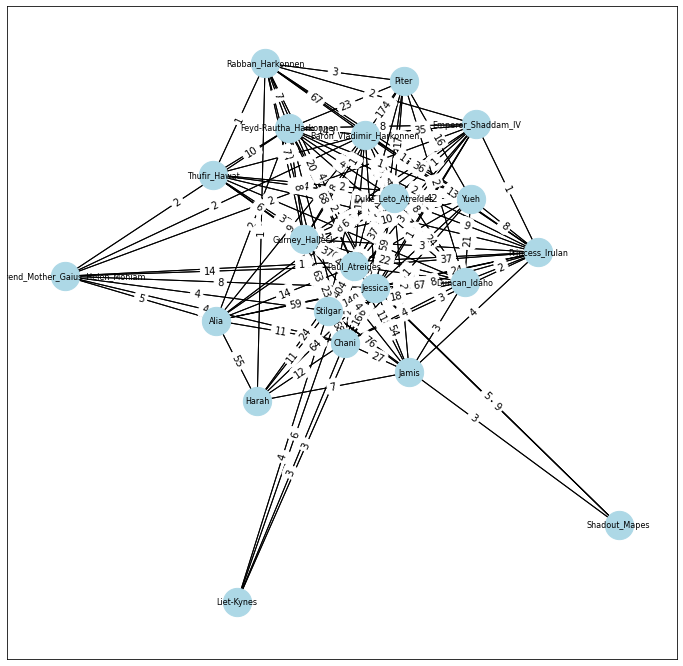

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightblue")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
# Nodes as tuples of nodes and edge attributes
list(G.edges(data=True))

[('Paul_Atreides', 'Jessica', {'weight': 531}),
 ('Paul_Atreides', 'Duke_Leto_Atreides', {'weight': 37}),
 ('Paul_Atreides', 'Baron_Vladimir_Harkonnen', {'weight': 15}),
 ('Paul_Atreides', 'Thufir_Hawat', {'weight': 37}),
 ('Paul_Atreides', 'Gurney_Halleck', {'weight': 370}),
 ('Paul_Atreides', 'Duncan_Idaho', {'weight': 90}),
 ('Paul_Atreides', 'Reverend_Mother_Gaius_Helen_Mohiam', {'weight': 14}),
 ('Paul_Atreides', 'Feyd-Rautha_Harkonnen', {'weight': 68}),
 ('Paul_Atreides', 'Piter', {'weight': 2}),
 ('Paul_Atreides', 'Yueh', {'weight': 79}),
 ('Paul_Atreides', 'Stilgar', {'weight': 404}),
 ('Paul_Atreides', 'Chani', {'weight': 232}),
 ('Paul_Atreides', 'Emperor_Shaddam_IV', {'weight': 38}),
 ('Paul_Atreides', 'Liet-Kynes', {'weight': 6}),
 ('Paul_Atreides', 'Alia', {'weight': 14}),
 ('Paul_Atreides', 'Shadout_Mapes', {'weight': 5}),
 ('Paul_Atreides', 'Princess_Irulan', {'weight': 37}),
 ('Paul_Atreides', 'Jamis', {'weight': 118}),
 ('Paul_Atreides', 'Harah', {'weight': 24}),
 ('Pa

# C] CENTRALITY ANALYSIS

In [ ]:
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Paul_Atreides', 1.0),
 ('Jessica', 1.0),
 ('Princess_Irulan', 0.8),
 ('Duke_Leto_Atreides', 0.75),
 ('Baron_Vladimir_Harkonnen', 0.75),
 ('Gurney_Halleck', 0.75),
 ('Feyd-Rautha_Harkonnen', 0.75),
 ('Stilgar', 0.75),
 ('Chani', 0.75),
 ('Duncan_Idaho', 0.65),
 ('Yueh', 0.6000000000000001),
 ('Emperor_Shaddam_IV', 0.6000000000000001),
 ('Rabban_Harkonnen', 0.6000000000000001),
 ('Thufir_Hawat', 0.5),
 ('Alia', 0.5),
 ('Reverend_Mother_Gaius_Helen_Mohiam', 0.45),
 ('Piter', 0.45),
 ('Jamis', 0.45),
 ('Harah', 0.35000000000000003),
 ('Liet-Kynes', 0.2),
 ('Shadout_Mapes', 0.15000000000000002)]

In [ ]:
betc = nx.betweenness_centrality(G)
sorted(betc.items(), key=itemgetter(1), reverse=True)

[('Paul_Atreides', 0.10001499962026278),
 ('Jessica', 0.10001499962026278),
 ('Stilgar', 0.05042207792207792),
 ('Chani', 0.03568314726209463),
 ('Princess_Irulan', 0.021978241057188423),
 ('Baron_Vladimir_Harkonnen', 0.01864699627857522),
 ('Duke_Leto_Atreides', 0.01856117566643882),
 ('Feyd-Rautha_Harkonnen', 0.018022328548644332),
 ('Gurney_Halleck', 0.015474481658692184),
 ('Rabban_Harkonnen', 0.015073289283815598),
 ('Duncan_Idaho', 0.009676463886990202),
 ('Alia', 0.0066875522138680026),
 ('Emperor_Shaddam_IV', 0.005969469127363864),
 ('Yueh', 0.004607541581225792),
 ('Harah', 0.0036758563074352547),
 ('Jamis', 0.0035588972431077697),
 ('Reverend_Mother_Gaius_Helen_Mohiam', 0.001501860712387028),
 ('Thufir_Hawat', 0.0010047846889952154),
 ('Piter', 0.0010047846889952154),
 ('Liet-Kynes', 0.0),
 ('Shadout_Mapes', 0.0)]

In [ ]:
closc = nx.closeness_centrality(G)
sorted(closc.items(), key=itemgetter(1), reverse=True)

[('Paul_Atreides', 1.0),
 ('Jessica', 1.0),
 ('Princess_Irulan', 0.8333333333333334),
 ('Duke_Leto_Atreides', 0.8),
 ('Baron_Vladimir_Harkonnen', 0.8),
 ('Gurney_Halleck', 0.8),
 ('Feyd-Rautha_Harkonnen', 0.8),
 ('Stilgar', 0.8),
 ('Chani', 0.8),
 ('Duncan_Idaho', 0.7407407407407407),
 ('Yueh', 0.7142857142857143),
 ('Emperor_Shaddam_IV', 0.7142857142857143),
 ('Rabban_Harkonnen', 0.7142857142857143),
 ('Thufir_Hawat', 0.6666666666666666),
 ('Alia', 0.6666666666666666),
 ('Reverend_Mother_Gaius_Helen_Mohiam', 0.6451612903225806),
 ('Piter', 0.6451612903225806),
 ('Jamis', 0.6451612903225806),
 ('Harah', 0.6060606060606061),
 ('Liet-Kynes', 0.5555555555555556),
 ('Shadout_Mapes', 0.5405405405405406)]

In [ ]:
print('\n sorted pagerank:\n')
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)


 sorted pagerank:



[('Paul_Atreides', 0.2146965298985274),
 ('Jessica', 0.14120763863225386),
 ('Stilgar', 0.08360693723816703),
 ('Baron_Vladimir_Harkonnen', 0.07962125374116287),
 ('Chani', 0.05935713249478042),
 ('Gurney_Halleck', 0.05926046951628998),
 ('Duke_Leto_Atreides', 0.03996068255293364),
 ('Feyd-Rautha_Harkonnen', 0.03634311205454958),
 ('Piter', 0.03508922843442901),
 ('Jamis', 0.03318451310837079),
 ('Yueh', 0.032935505007361685),
 ('Duncan_Idaho', 0.03215691733619502),
 ('Alia', 0.025178428103990895),
 ('Harah', 0.024632706601785827),
 ('Rabban_Harkonnen', 0.019623333997489903),
 ('Princess_Irulan', 0.01938697773093698),
 ('Emperor_Shaddam_IV', 0.018028308225125154),
 ('Thufir_Hawat', 0.0173439857477446),
 ('Reverend_Mother_Gaius_Helen_Mohiam', 0.011229858574677246),
 ('Shadout_Mapes', 0.008623590100314753),
 ('Liet-Kynes', 0.0085328909029134)]

# D] CLUSTERING COEFFICIENTS

In [ ]:
print(nx.transitivity(G))


0.7270501835985312


In [ ]:
#Global clustering coeff
print(nx.average_clustering(G))

0.7982458574563838


In [ ]:
#Local clustering coeff for characters
nx.clustering(G)

{'Alia': 0.8222222222222222,
 'Baron_Vladimir_Harkonnen': 0.7523809523809524,
 'Chani': 0.6571428571428571,
 'Duke_Leto_Atreides': 0.7523809523809524,
 'Duncan_Idaho': 0.8205128205128205,
 'Emperor_Shaddam_IV': 0.8484848484848485,
 'Feyd-Rautha_Harkonnen': 0.7619047619047619,
 'Gurney_Halleck': 0.780952380952381,
 'Harah': 0.7619047619047619,
 'Jamis': 0.8888888888888888,
 'Jessica': 0.5684210526315789,
 'Liet-Kynes': 1.0,
 'Paul_Atreides': 0.5684210526315789,
 'Piter': 0.9444444444444444,
 'Princess_Irulan': 0.7416666666666667,
 'Rabban_Harkonnen': 0.7424242424242424,
 'Reverend_Mother_Gaius_Helen_Mohiam': 0.9166666666666666,
 'Shadout_Mapes': 1.0,
 'Stilgar': 0.6,
 'Thufir_Hawat': 0.9555555555555556,
 'Yueh': 0.8787878787878788}

**DETECTING COMMUNITIES**



Clique Percolation Method

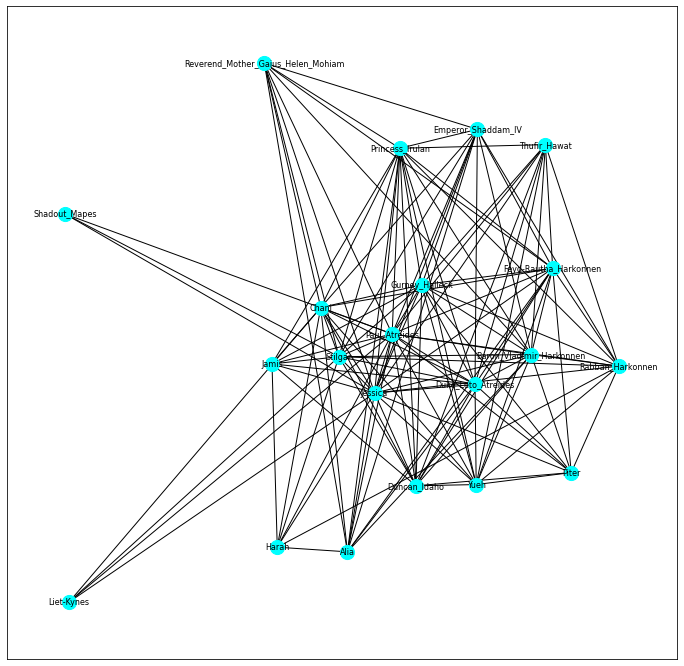

In [ ]:
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [ ]:
list(nx.find_cliques(G))  # Search for all maximal cliques in a graph.

[['Paul_Atreides', 'Jessica', 'Shadout_Mapes', 'Stilgar'],
 ['Paul_Atreides',
  'Jessica',
  'Piter',
  'Feyd-Rautha_Harkonnen',
  'Yueh',
  'Baron_Vladimir_Harkonnen',
  'Gurney_Halleck',
  'Duke_Leto_Atreides',
  'Duncan_Idaho'],
 ['Paul_Atreides',
  'Jessica',
  'Piter',
  'Feyd-Rautha_Harkonnen',
  'Yueh',
  'Baron_Vladimir_Harkonnen',
  'Gurney_Halleck',
  'Rabban_Harkonnen'],
 ['Paul_Atreides',
  'Jessica',
  'Princess_Irulan',
  'Stilgar',
  'Gurney_Halleck',
  'Duke_Leto_Atreides',
  'Baron_Vladimir_Harkonnen',
  'Emperor_Shaddam_IV'],
 ['Paul_Atreides',
  'Jessica',
  'Princess_Irulan',
  'Stilgar',
  'Gurney_Halleck',
  'Duke_Leto_Atreides',
  'Baron_Vladimir_Harkonnen',
  'Duncan_Idaho'],
 ['Paul_Atreides',
  'Jessica',
  'Princess_Irulan',
  'Stilgar',
  'Gurney_Halleck',
  'Duke_Leto_Atreides',
  'Chani',
  'Jamis',
  'Duncan_Idaho'],
 ['Paul_Atreides',
  'Jessica',
  'Princess_Irulan',
  'Stilgar',
  'Gurney_Halleck',
  'Duke_Leto_Atreides',
  'Chani',
  'Emperor_Shaddam_

In [ ]:
synthetic = nx.make_max_clique_graph(G)  
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph. 
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5,

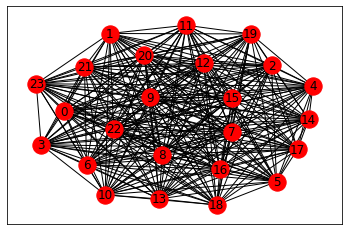

In [ ]:
nx.draw_networkx(synthetic,node_color='red')

k-clique Community

In [ ]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[frozenset({'Piter', 'Feyd-Rautha_Harkonnen', 'Yueh', 'Gurney_Halleck', 'Jessica', 'Thufir_Hawat', 'Paul_Atreides', 'Princess_Irulan', 'Baron_Vladimir_Harkonnen', 'Chani', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Rabban_Harkonnen'}), frozenset({'Stilgar', 'Princess_Irulan', 'Gurney_Halleck', 'Jessica', 'Chani', 'Jamis', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Paul_Atreides'})]


In [ ]:
print(len(list(c)))

2


In [ ]:
print(list(c[0]))
print(list(c[1]))

['Piter', 'Feyd-Rautha_Harkonnen', 'Yueh', 'Gurney_Halleck', 'Jessica', 'Thufir_Hawat', 'Paul_Atreides', 'Princess_Irulan', 'Baron_Vladimir_Harkonnen', 'Chani', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Rabban_Harkonnen']
['Stilgar', 'Princess_Irulan', 'Gurney_Halleck', 'Jessica', 'Chani', 'Jamis', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Paul_Atreides']


# E] DEGREE DISTRIBUTION AND GENERATIVE MODEL



In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  21
Edges:  128
Average degree:  6.095238095238095


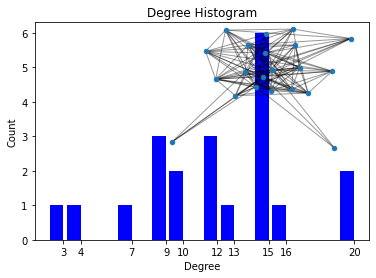

In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

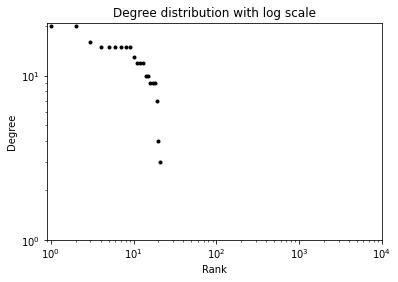

In [ ]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

SIZE OF LARGEST COMPONENT

In [ ]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: True

 no of connected components: 1

 Connected component length:21

 Connected component :
{'Shadout_Mapes', 'Piter', 'Yueh', 'Reverend_Mother_Gaius_Helen_Mohiam', 'Thufir_Hawat', 'Paul_Atreides', 'Princess_Irulan', 'Alia', 'Duncan_Idaho', 'Emperor_Shaddam_IV', 'Rabban_Harkonnen', 'Feyd-Rautha_Harkonnen', 'Stilgar', 'Harah', 'Gurney_Halleck', 'Jessica', 'Liet-Kynes', 'Baron_Vladimir_Harkonnen', 'Chani', 'Jamis', 'Duke_Leto_Atreides'}


Therefore size of the largest connected component is 21.

AVERAGE SHORTEST PATH

In [ ]:
sum = 0
for i in range(len(characters)):
  for j in range(i, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  2.4904761904761905


COMPARING WITH GENERATIVE MODELS TO COMPARE THE GRAPH WITH

In [ ]:
nodes=G.number_of_nodes()
nodes

21

In [ ]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Paul_Atreides  : Degree is  20
Node  Jessica  : Degree is  20
Node  Duke_Leto_Atreides  : Degree is  15
Node  Baron_Vladimir_Harkonnen  : Degree is  15
Node  Thufir_Hawat  : Degree is  10


3.8095238095238093

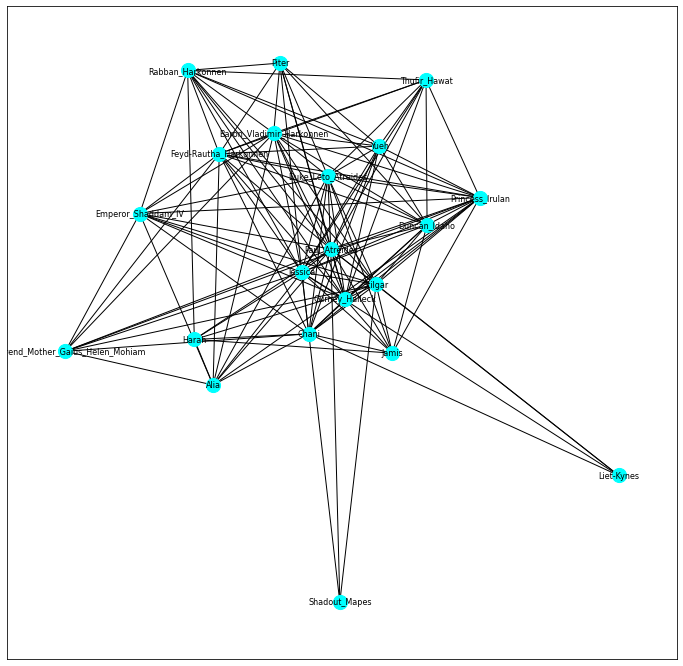

In [ ]:
#Original graph
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

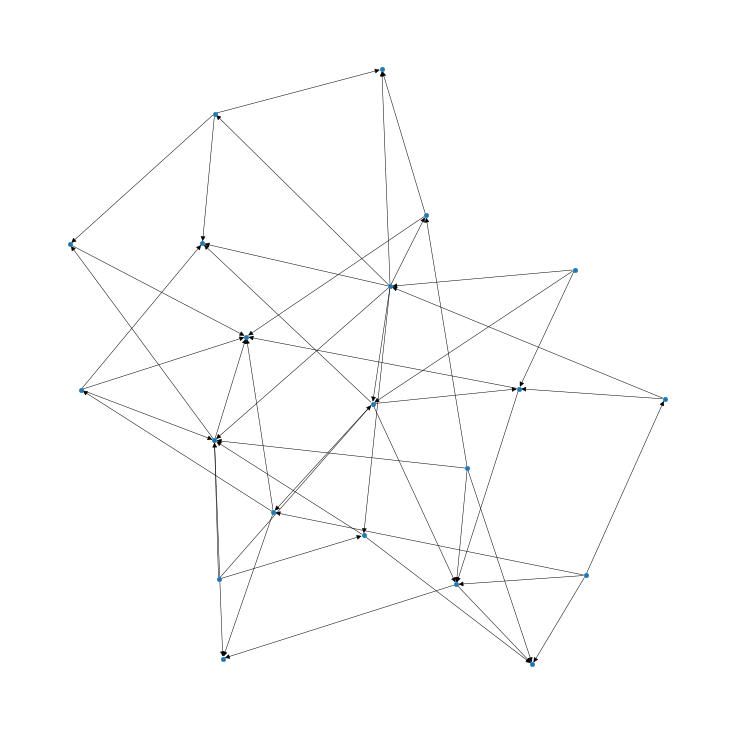

In [ ]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

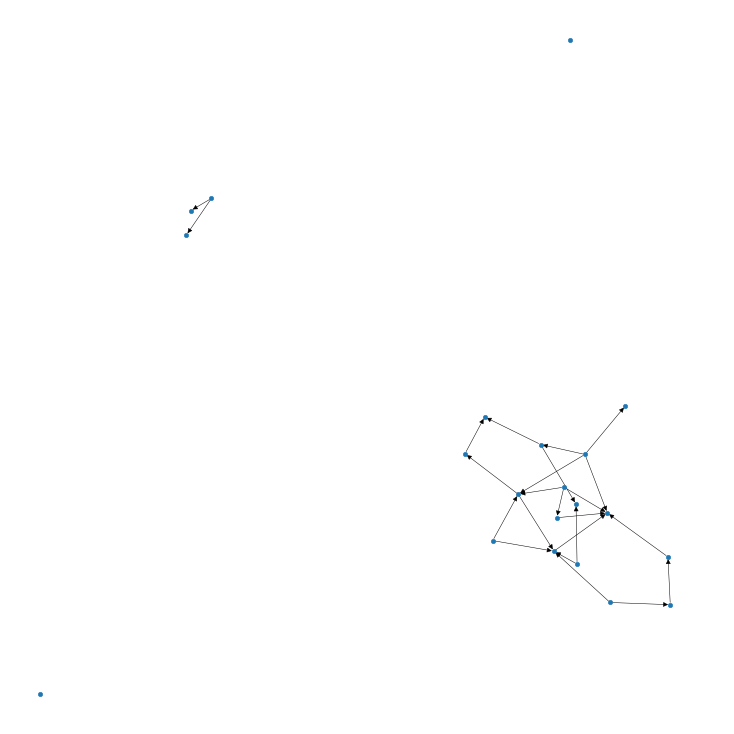

In [ ]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

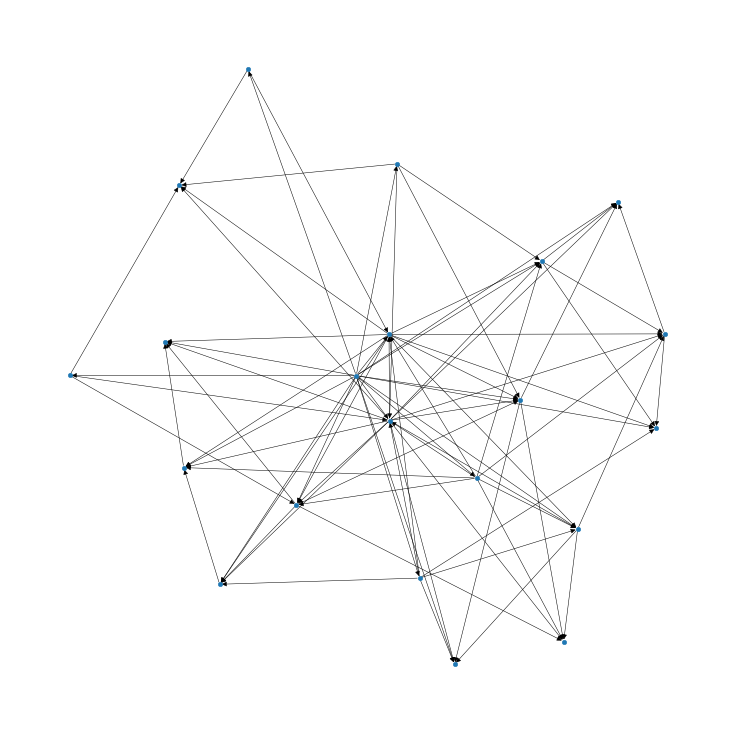

In [ ]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

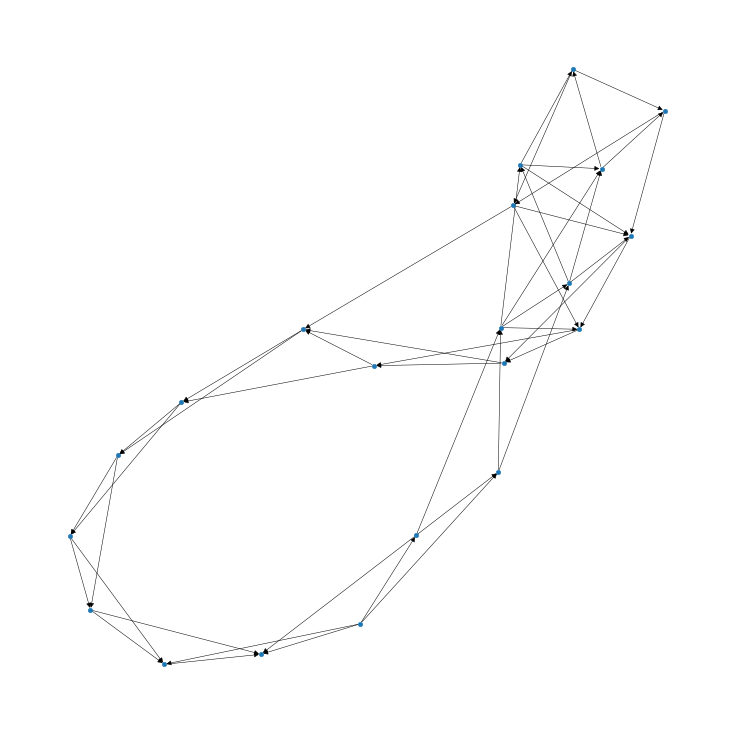

In [ ]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

# F] ANALYSIS - CHARACTER STUDY

Comparing centrality values to determine the protagnoist

In [ ]:
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
deg_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(deg_list[i])

('Paul_Atreides', 1.0)
('Jessica', 1.0)
('Princess_Irulan', 0.8)
('Duke_Leto_Atreides', 0.75)
('Baron_Vladimir_Harkonnen', 0.75)


In [ ]:
betc = nx.betweenness_centrality(G)
bet_list = sorted(betc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(bet_list[i])

('Paul_Atreides', 0.10001499962026278)
('Jessica', 0.10001499962026278)
('Stilgar', 0.05042207792207792)
('Chani', 0.03568314726209463)
('Princess_Irulan', 0.021978241057188423)


In [ ]:
closc = nx.closeness_centrality(G)
clo_list = sorted(closc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(clo_list[i])

('Paul_Atreides', 1.0)
('Jessica', 1.0)
('Princess_Irulan', 0.8333333333333334)
('Duke_Leto_Atreides', 0.8)
('Baron_Vladimir_Harkonnen', 0.8)


In [ ]:
pgr=nx.pagerank(G)
pag_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(pag_list[i])

('Paul_Atreides', 0.2146965298985274)
('Jessica', 0.14120763863225386)
('Stilgar', 0.08360693723816703)
('Baron_Vladimir_Harkonnen', 0.07962125374116287)
('Chani', 0.05935713249478042)


In [ ]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [ ]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [ ]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: (0.7736192498751394, 3.8947645935904535e-05)

 Pearson Correlation Coeff deg and closeness: (0.9790225394572142, 1.374364301147352e-14)

 Pearson Correlation Coeff betweennness and closeness: (0.8726469088585738, 2.4869186438510535e-07)

 Pearson Correlation Coeff betweennness and eigenvector : (0.6597095503698451, 0.0011390601238700007)


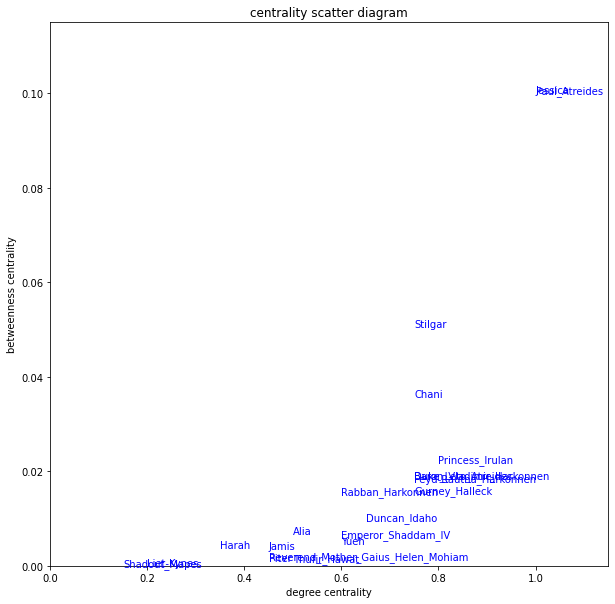

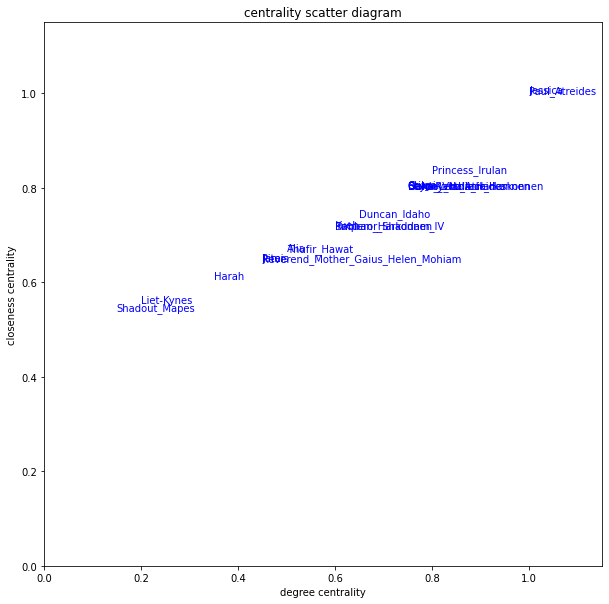

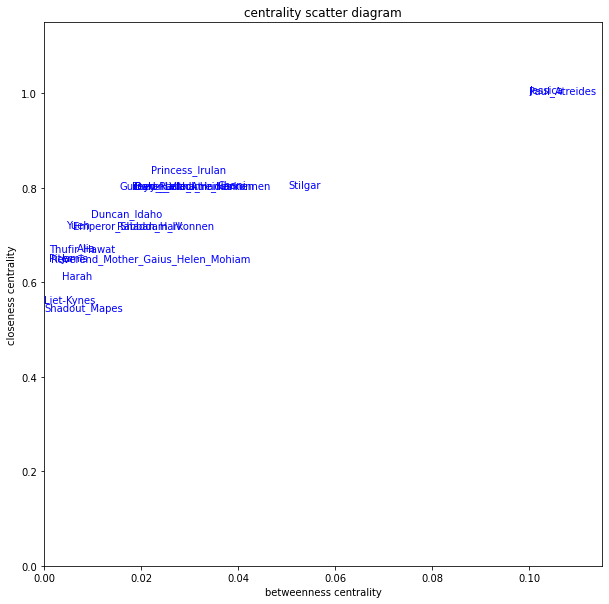

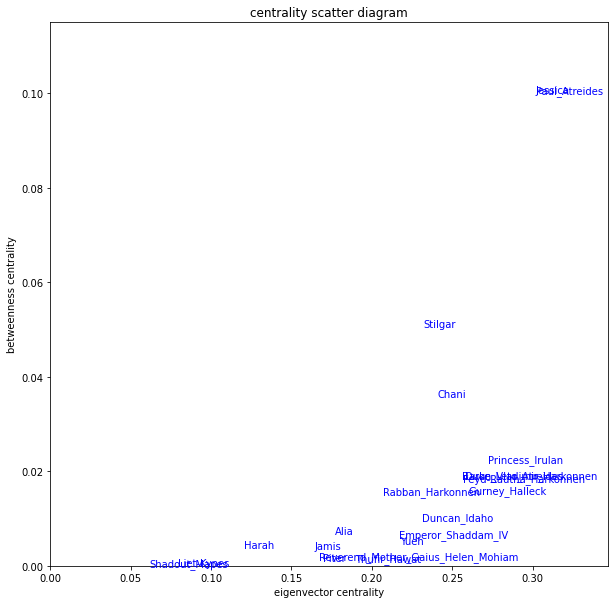

In [ ]:
##########################
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

According to the book the protagonist is Paul Atriedes and our centrality measure have proved the same.

EGO NETWORK

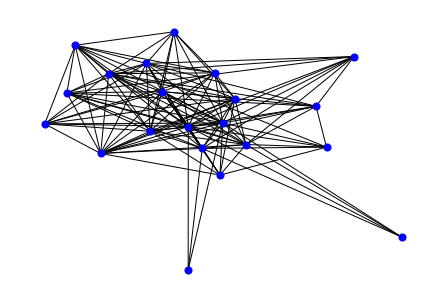

In [ ]:
s='Paul_Atreides'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.savefig('Medici.png')
plt.show()
nx.write_gml(hub_ego,"egonw_paul.gml")

The ego network is esentially the whole graph which shows that the ego i.e. the protagonist is well connected to all the other characters.

AVERAGE SHORTEST PATH

In [ ]:
sum = 0
for i in range(len(characters)):
  for j in range(i+1, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  2.3904761904761904


Generative models are supposed to have a small average geodesic and our model also has a small average shortest path.

CLUSTERING COEFFICIENT

In [ ]:
#Local clustering coeff for characters
nx.clustering(G)

{'Alia': 0.8222222222222222,
 'Baron_Vladimir_Harkonnen': 0.7523809523809524,
 'Chani': 0.6571428571428571,
 'Duke_Leto_Atreides': 0.7523809523809524,
 'Duncan_Idaho': 0.8205128205128205,
 'Emperor_Shaddam_IV': 0.8484848484848485,
 'Feyd-Rautha_Harkonnen': 0.7619047619047619,
 'Gurney_Halleck': 0.780952380952381,
 'Harah': 0.7619047619047619,
 'Jamis': 0.8888888888888888,
 'Jessica': 0.5684210526315789,
 'Liet-Kynes': 1.0,
 'Paul_Atreides': 0.5684210526315789,
 'Piter': 0.9444444444444444,
 'Princess_Irulan': 0.7416666666666667,
 'Rabban_Harkonnen': 0.7424242424242424,
 'Reverend_Mother_Gaius_Helen_Mohiam': 0.9166666666666666,
 'Shadout_Mapes': 1.0,
 'Stilgar': 0.6,
 'Thufir_Hawat': 0.9555555555555556,
 'Yueh': 0.8787878787878788}

The main protagonists Paut Atreides and Jessica have relatively low clustering coefficients which signifies that they are central characters.


The characters that have a high clustering coefficent are not central characters.

COMMUNITIES

In [ ]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[frozenset({'Piter', 'Feyd-Rautha_Harkonnen', 'Yueh', 'Gurney_Halleck', 'Jessica', 'Thufir_Hawat', 'Paul_Atreides', 'Princess_Irulan', 'Baron_Vladimir_Harkonnen', 'Chani', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Rabban_Harkonnen'}), frozenset({'Stilgar', 'Princess_Irulan', 'Gurney_Halleck', 'Jessica', 'Chani', 'Jamis', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Paul_Atreides'})]


In [ ]:
print(len(list(c)))

2


In [ ]:
print(list(c[0]))
print(list(c[1]))

['Piter', 'Feyd-Rautha_Harkonnen', 'Yueh', 'Gurney_Halleck', 'Jessica', 'Thufir_Hawat', 'Paul_Atreides', 'Princess_Irulan', 'Baron_Vladimir_Harkonnen', 'Chani', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Rabban_Harkonnen']
['Stilgar', 'Princess_Irulan', 'Gurney_Halleck', 'Jessica', 'Chani', 'Jamis', 'Duncan_Idaho', 'Duke_Leto_Atreides', 'Paul_Atreides']


**Community 1** : This community deals with the interaction between Fremen and the House of Atreides.  

**Community 2** : Atreides and Harkonnens are the two main feuding families and a significant part of the book is dedicated to this rivalry. This community represents the major characters from both the families.

Generative model

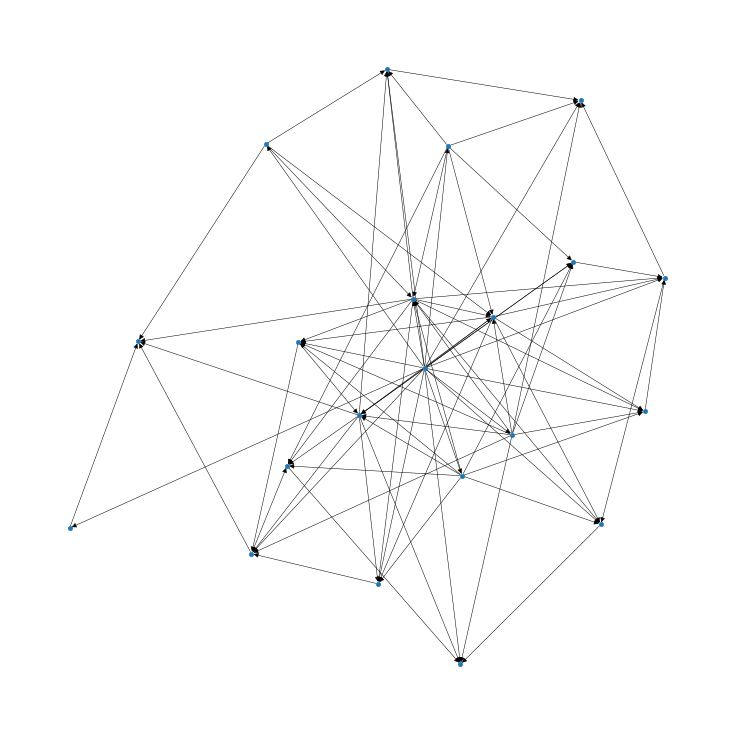

In [ ]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

We compare our graph with the Preferential Attachment model where the main feature is that nodes tend to get attached to other nodes that have a high degree. This largely follows social networks in real life. This model follows the power law distribution and has a low average shortest path length, but not a high clustering coefficient. Our graph has a low average shortest path length and a high clustering coefficient but it doesn't follow power law distribution and so the graph is partially consistent with this model because characters tend to get connected to our protagonists who play a central role in the story.